# Создание виртуального окружения для работы Python 3.12
 python -m venv Py312 
# активация виртуального окружения
 .Py312v\Scripts\activat
# Установка YOLO v5
git clone https://github.com/ultralytics/yolov5.git
pip install ultralytics
cd yolov5
pip install -r requirements.txt  # install# Далее следуют ошибки совместимости пакетовpe

# Удалил виртуальное окружение Python 3.12 установил Python 3.10
# Повторил 
 python -m venv Py310
# активация виртуального окружения
.\Py310\Scripts\activate
# Установка YOLO v5
git clone https://github.com/ultralytics/yolov5.git
pip install ultralytics
cd yolov5
pip install -r requirements.txt  # install

# Запустим детектирование с камеры
python detect.py --weights yolov5s.pt --source 0 --save-crop

# результаты детектирования кота
runs/detect/exp8/crops/cat:            

![alt text](yolov5/runs/detect/exp8/crops/cat/065.jpg)
![alt text](yolov5/runs/detect/exp8/crops/cat/069.jpg)
![alt text](yolov5/runs/detect/exp8/crops/cat/070.jpg)
![alt text](yolov5/runs/detect/exp8/crops/cat/033.jpg)

---
# Кастомное Обучение и Тестирование

Создадим модель детектирования распознавания показаний счетчика учета воды  
Для этого сгенерируем синтетические картинки счетчиков и аннотаций к ним в формате YOLO  
[Описание модели](yolov5/data/dpi.yaml)  
Данные датасета сохранены ..\datasets\dpi  
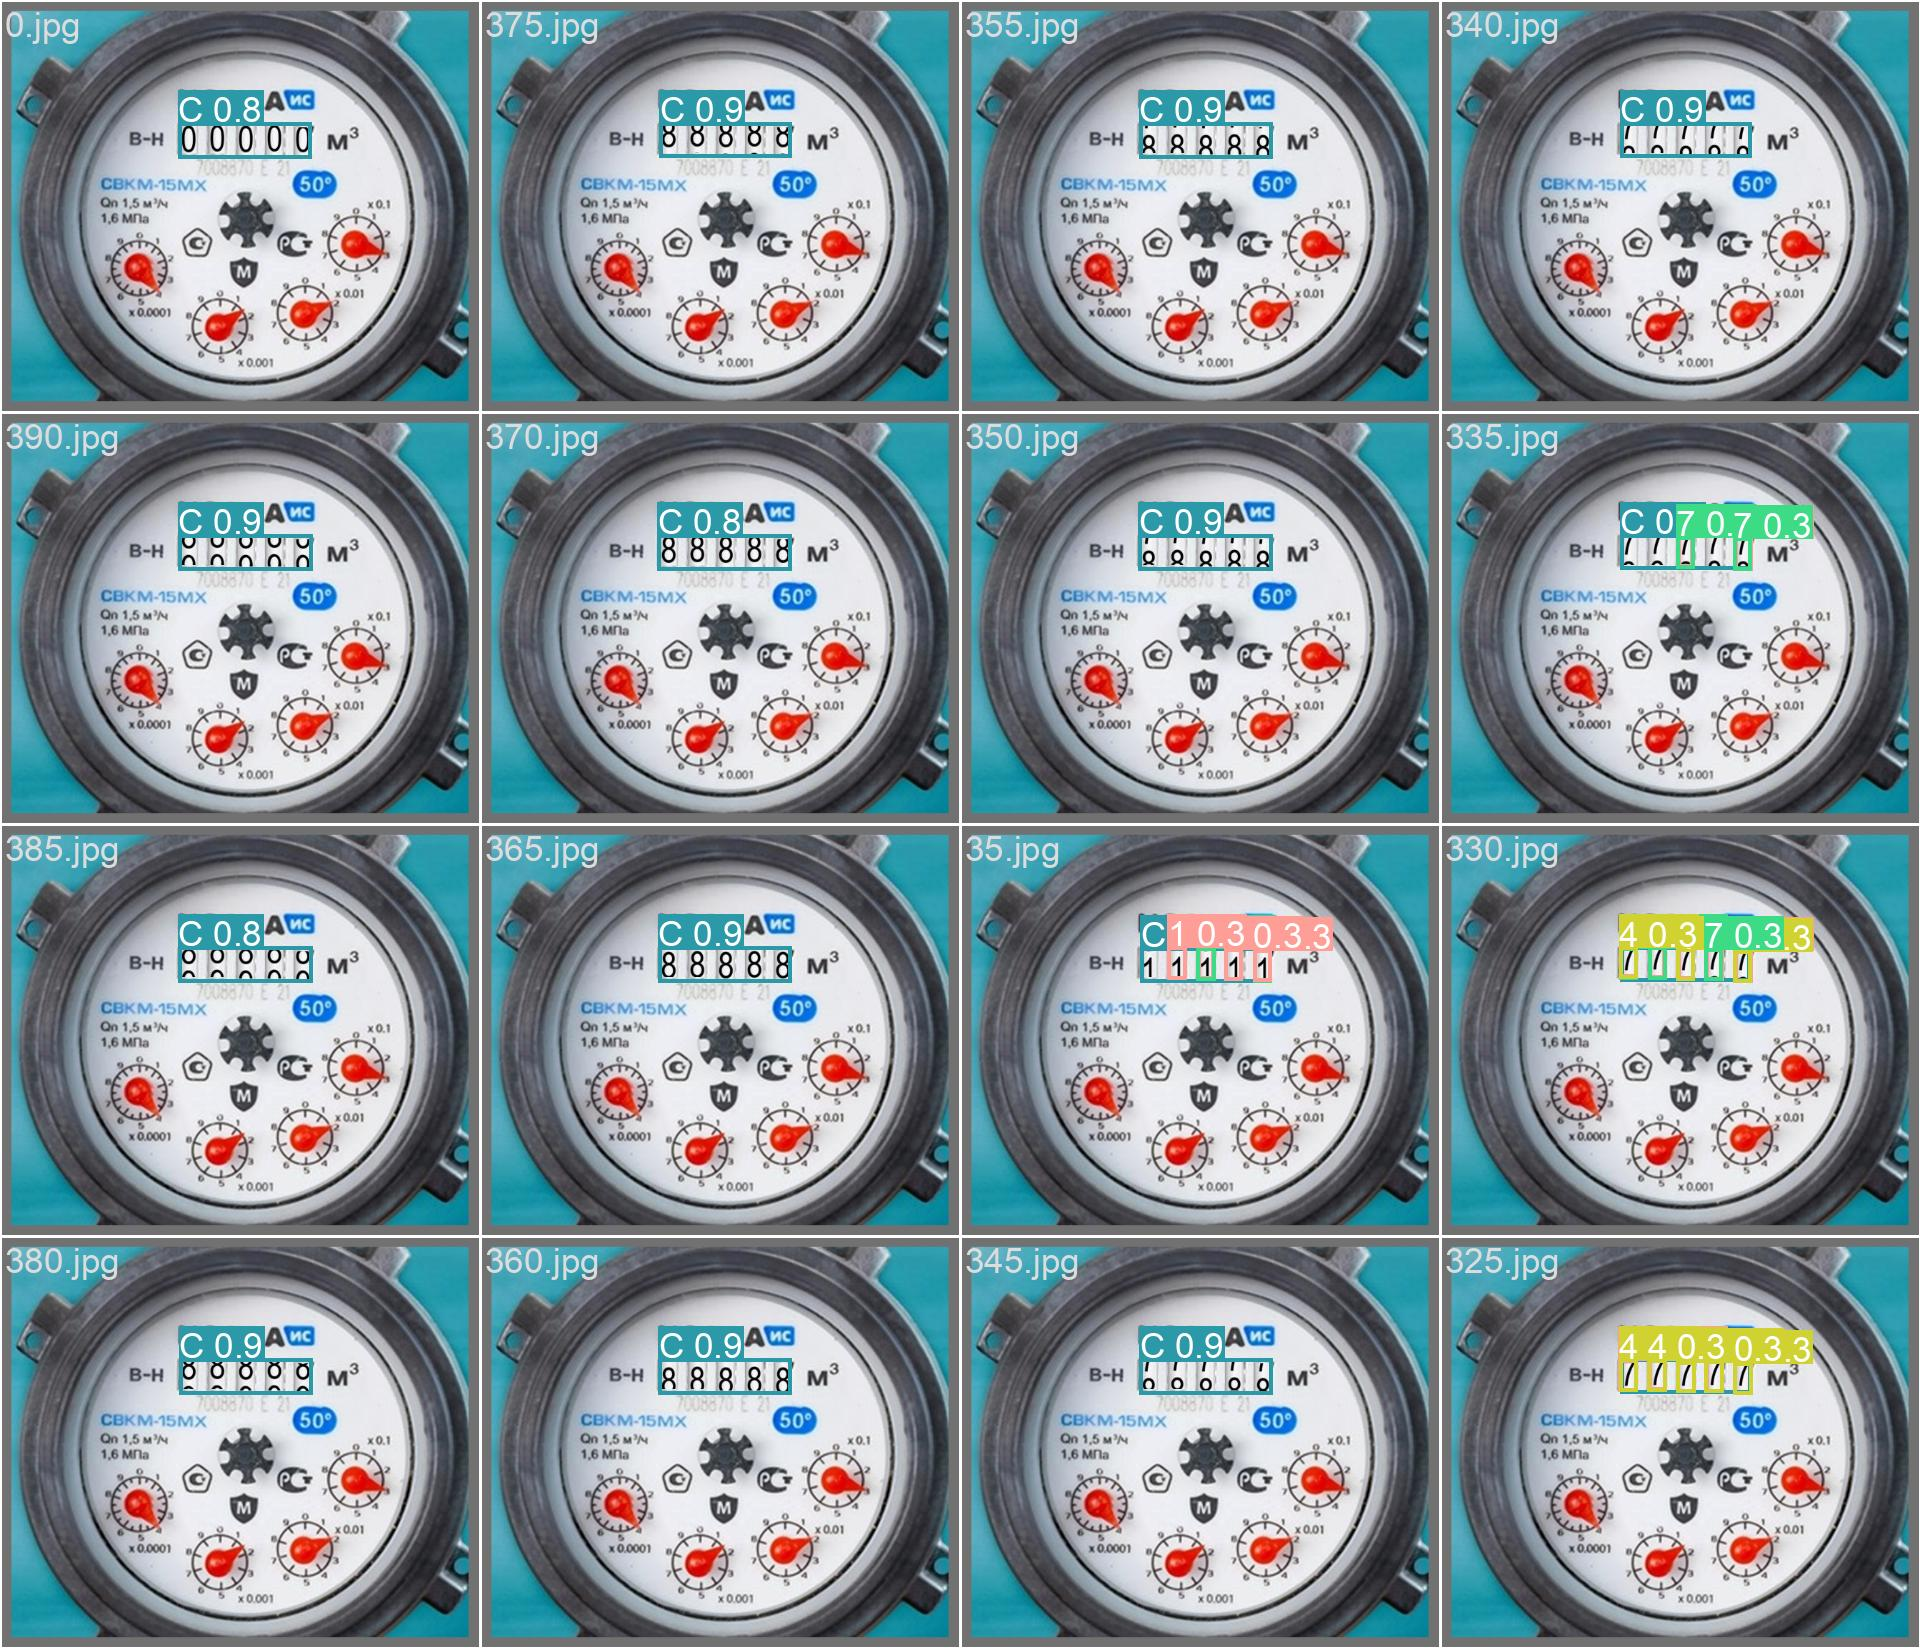

# Запуск обучения
python train.py --img 640 --batch 16 --epochs 100 --data dpi.yaml --weights yolov5s.pt  
Результат обучения - нерабочий  
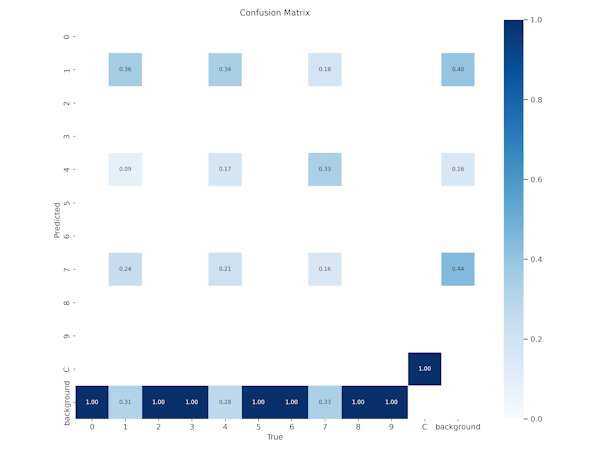

Решил что размер сегментов на картинке слишком мал для обучени. Переделал датасет:  
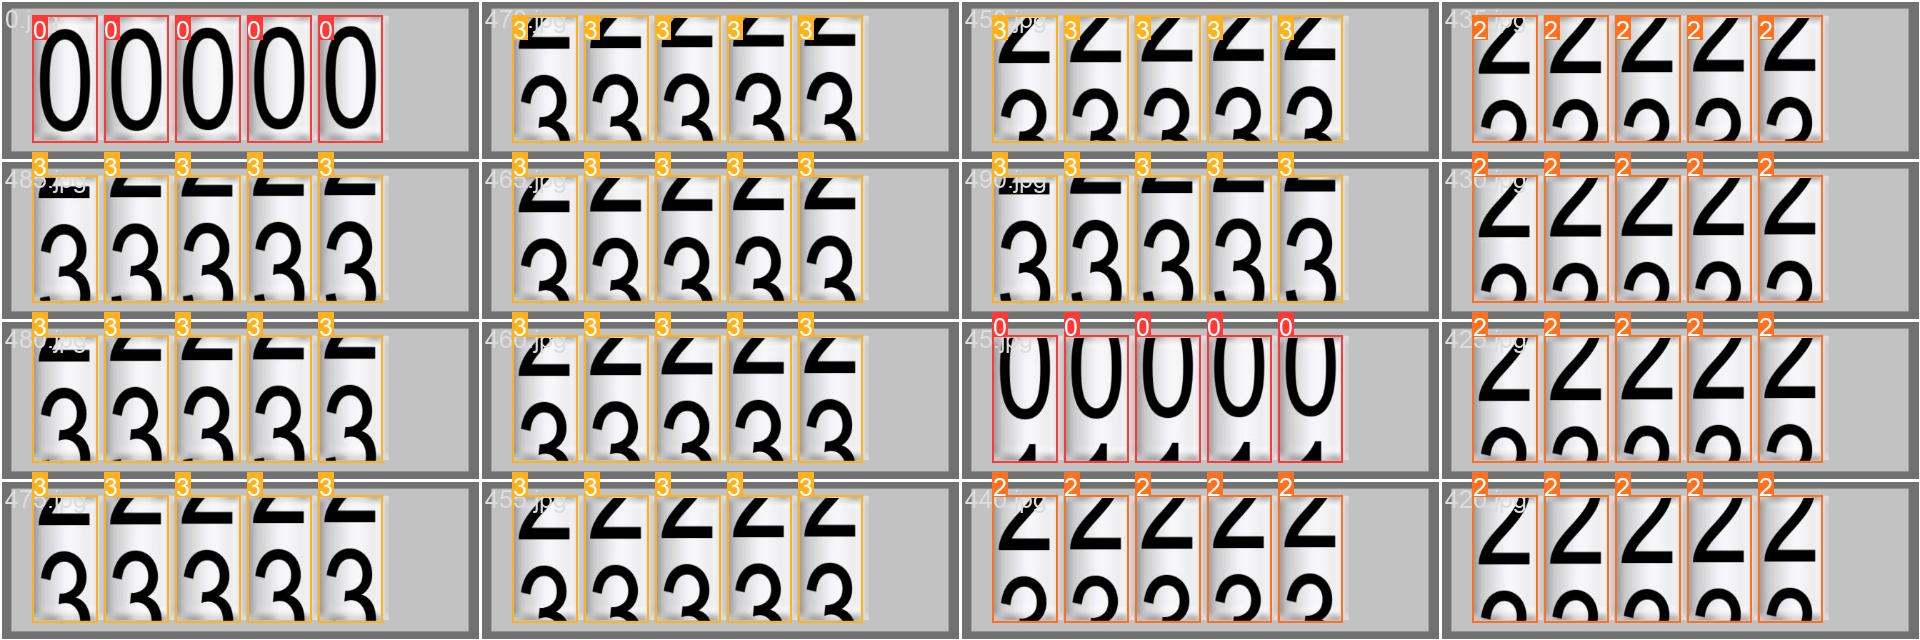

Результат гораздо лучше:  
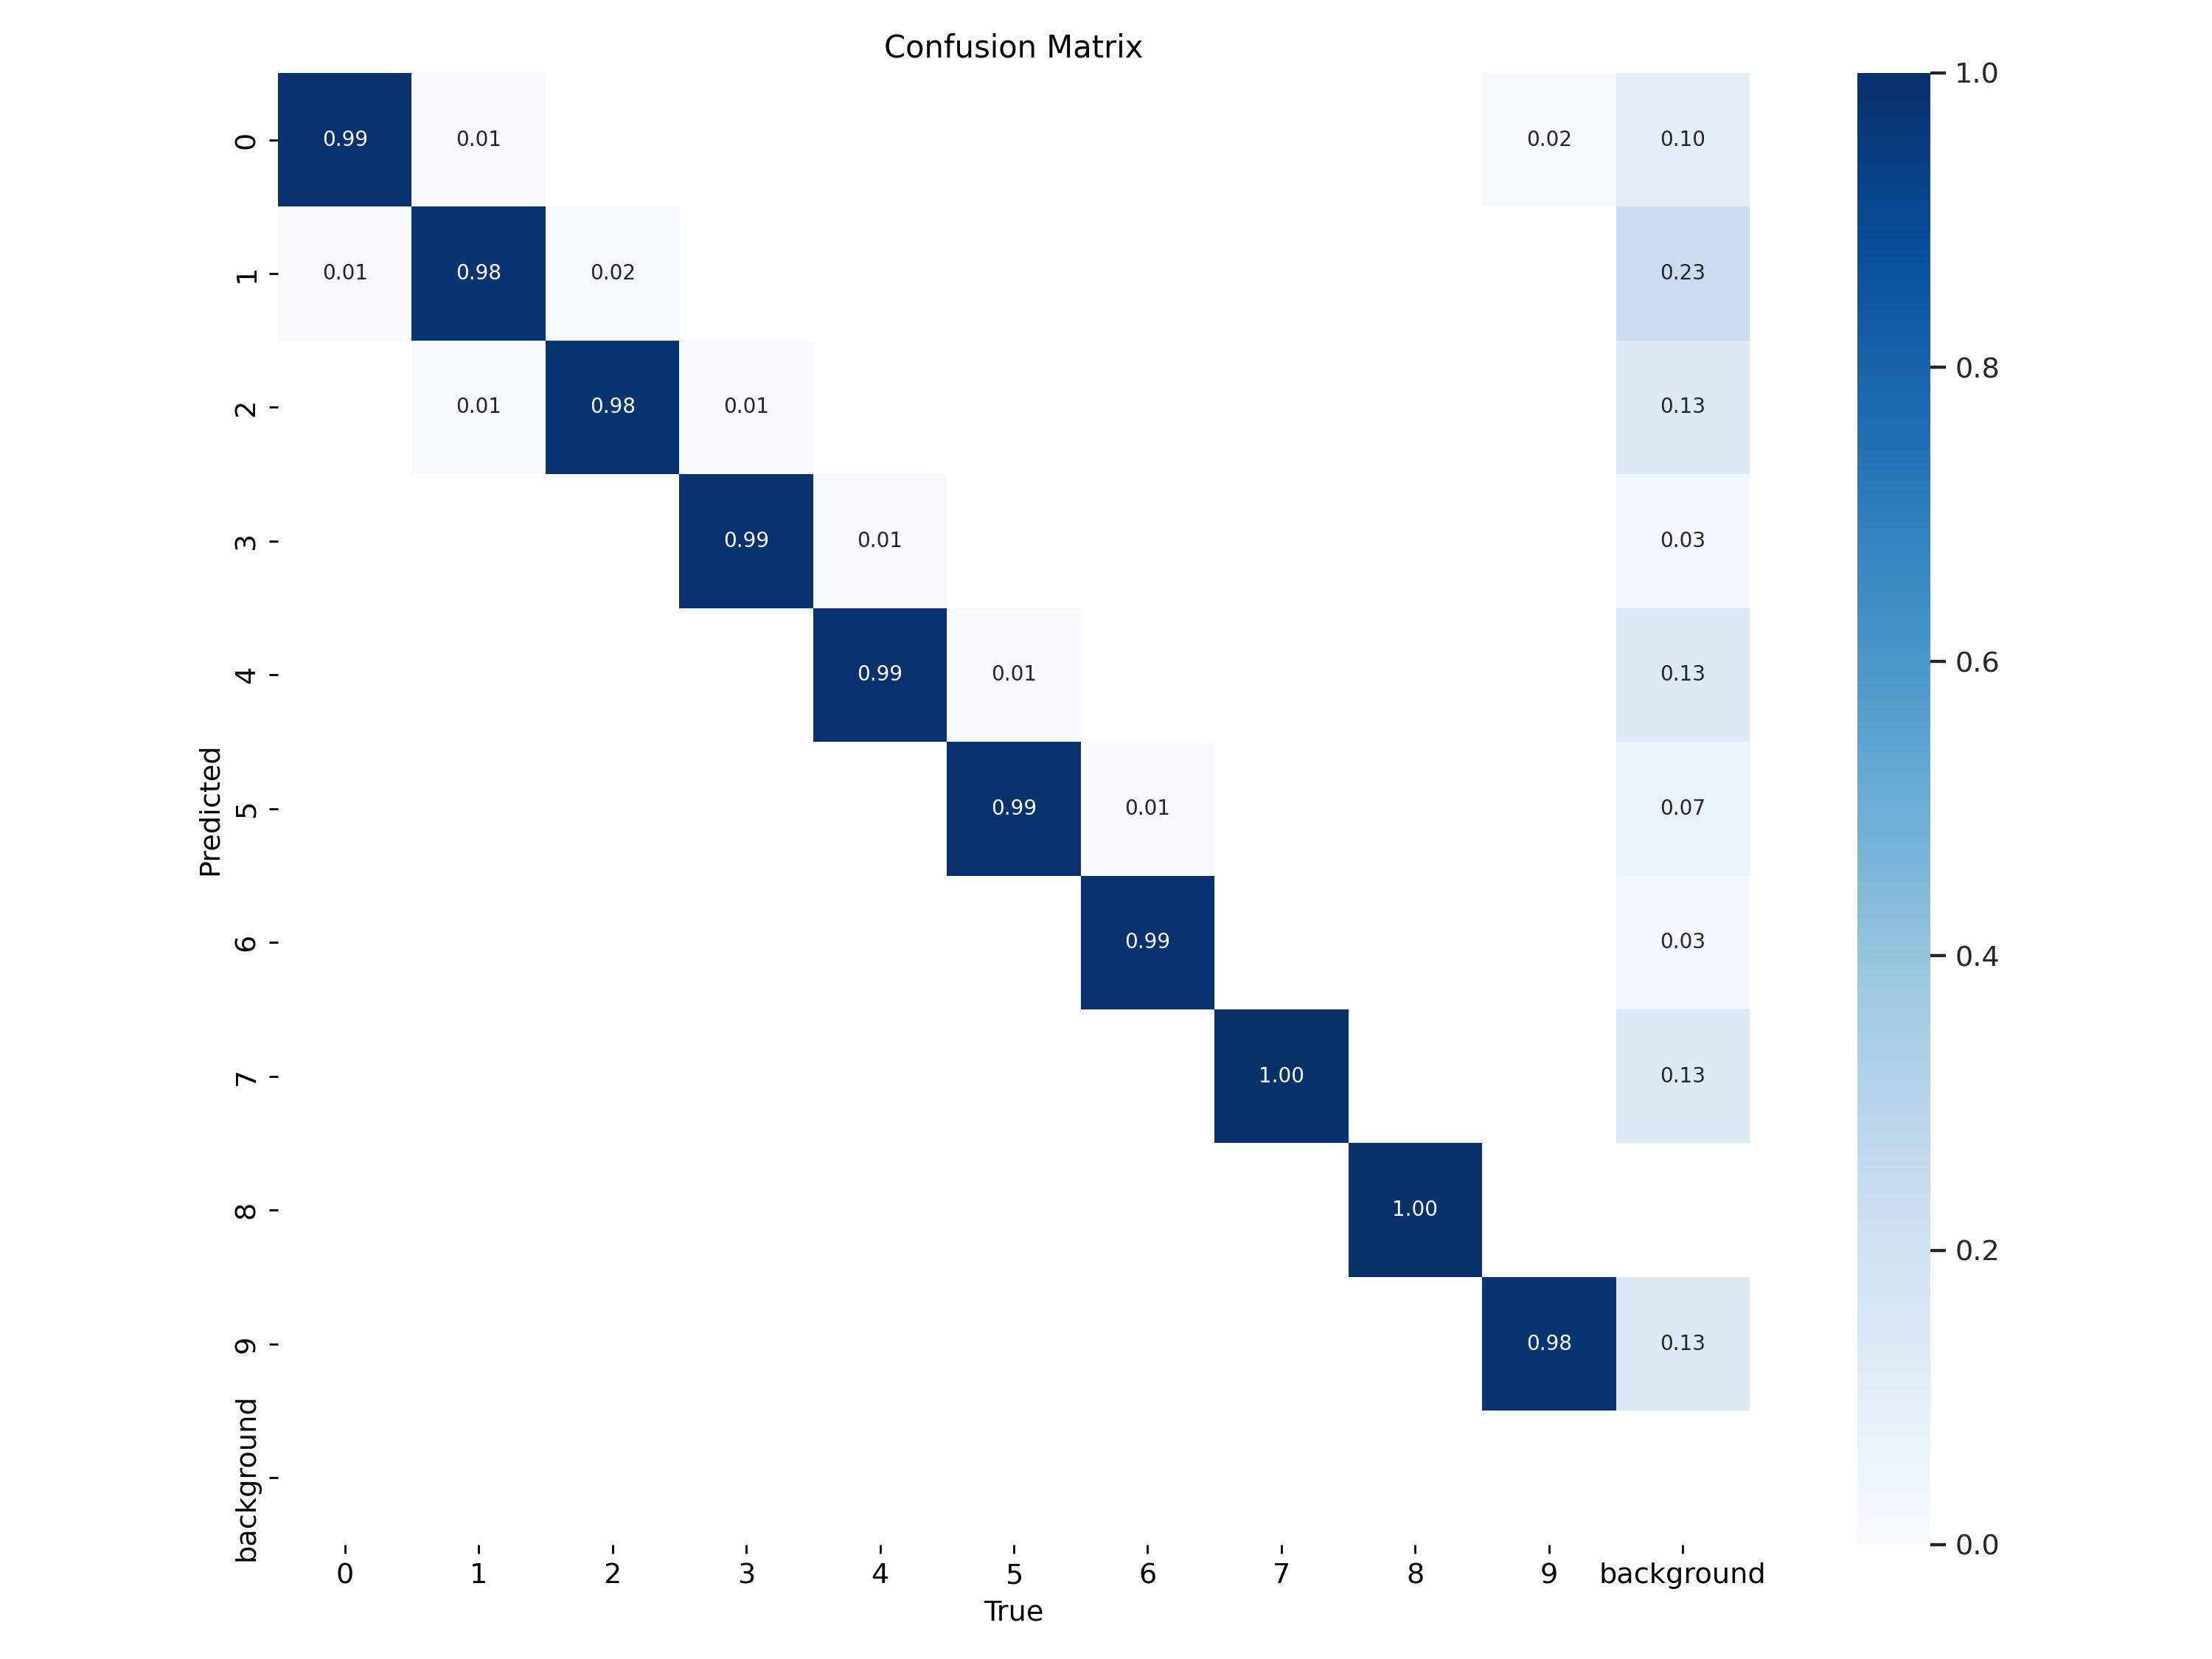

Но во время детектирования с камеры очень плохо распознавал на разных масштабах  
Поэтому решил настроить гиперпараметры аугментации данных  

Запускал тренировку с --hyp  
Изменяя hyp.scratch-V1.yaml
python train.py --img 640 --batch 16 --epochs 300 --data dpi.yaml --weights yolov5s.pt --hyp hyp.scratch-V1.yaml

Вариант картинок где перестарался с искажением проекции
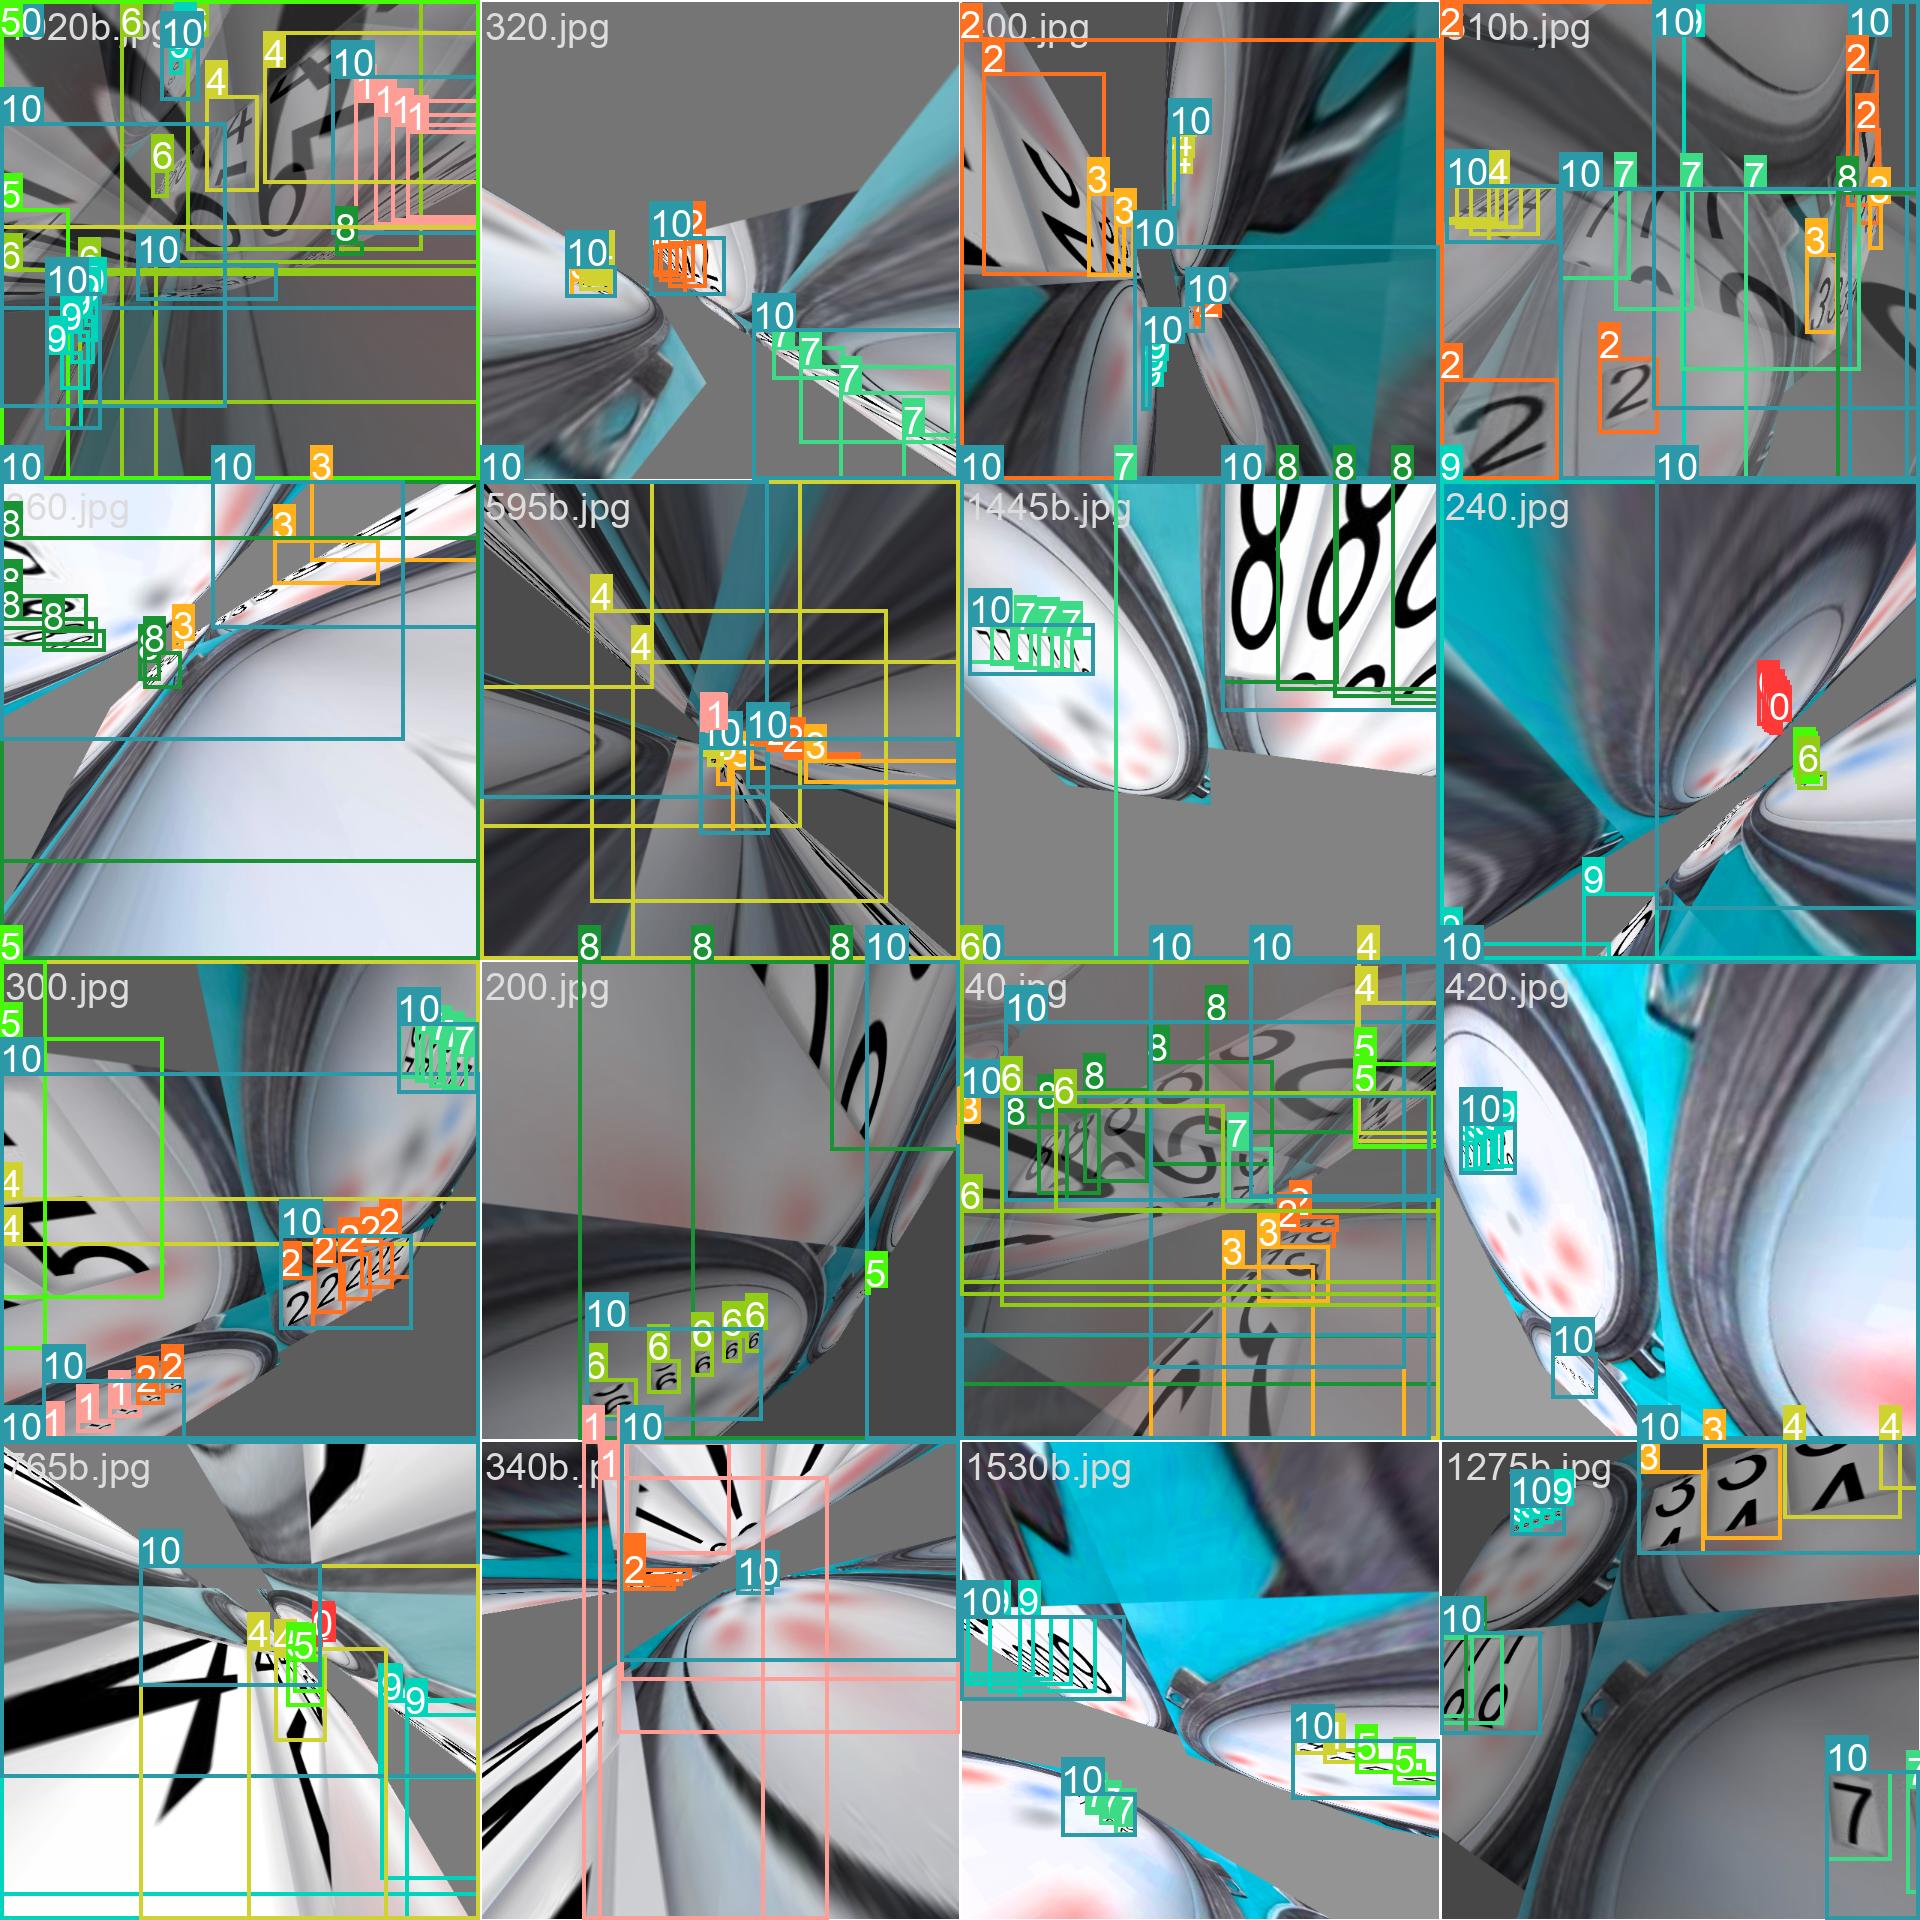

Последний вариант аугментации данных  (23 эксперимент)
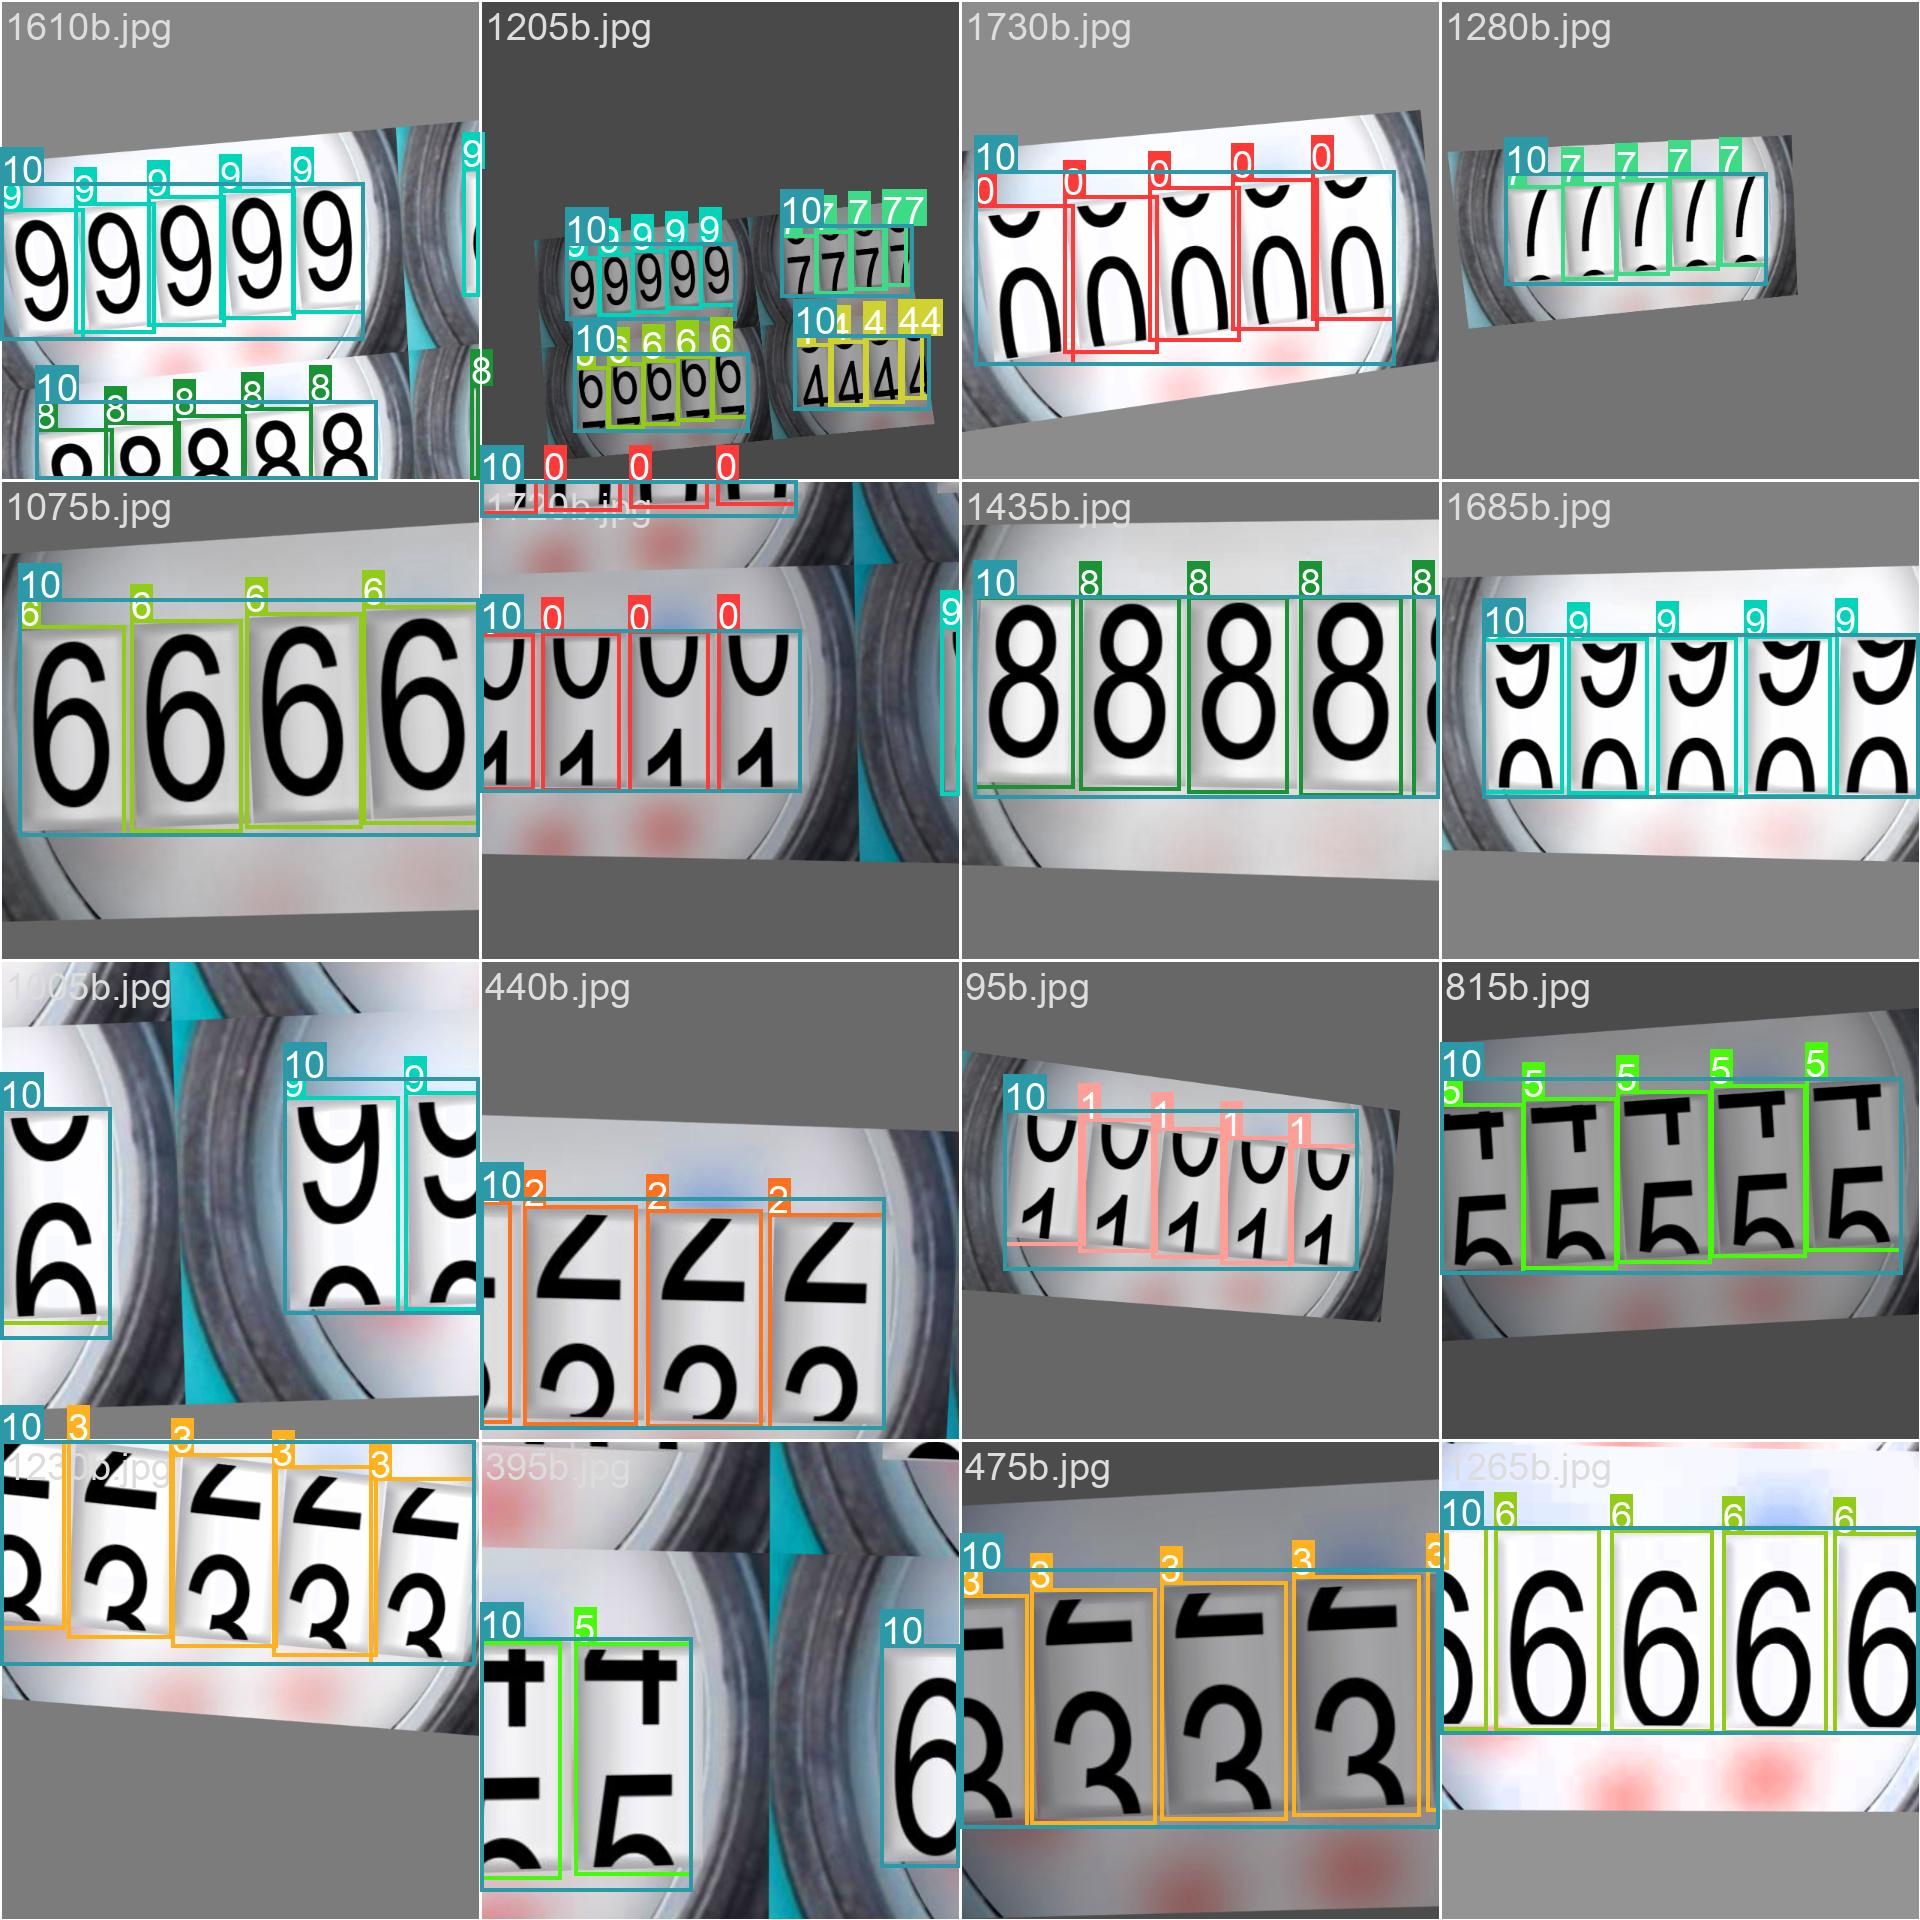

Обучение 300 эпох по времени 6 часов

# Результаты работы модели
<video width="320" height="240" controls>
  <source src="yolov5/runs/detect/exp14/0.avi" type="video/avi">
</video>
<video width="320" height="240" controls>
  <source src="yolov5/runs/detect/exp15/0.avi" type="video/avi">
</video>

---
# TensorBoard
Во время обучения для контроля экспериментов использовал TensorBoard  
![alt text](img/tf1.png)
![alt text](img/tf2.png)
![alt text](img/tf3.png)